# Sample of Bitcoin User Graph Analysis

Once you made the user graph according to our instruction, then you can have so much fun with that! This notebook demonstrates on how to analyse the graphs. We will be demo-ing samples only in this notebook due to size constraints. Full sized graph is in our report.

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

## How to draw a simple degree distribution graph?

In [2]:
G = nx.Graph() 

We created a `sampleusergraph.txt` which is a sample from user graph. First we add the edges to the graph.

In [3]:
infile = open("sampleusergraph.txt", "r+")

for line in infile:
    stuff = line.rstrip().split(",")
    G.add_edge(stuff[0], stuff[1])

Now we calculate degree distribution. Firstly, we make a degree list, then apply counter to compute frequencies of those degrees.

In [4]:
degree_list = list(zip(*list(G.degree())))[1]
counter = collections.Counter(degree_list)

Finally we make a log-log degree distribution graph.

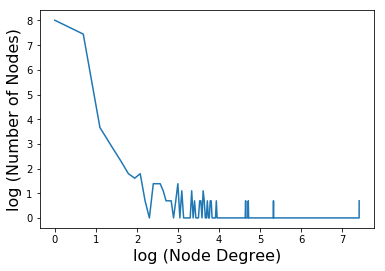

In [5]:
least = min(counter.keys())
most = max(counter.keys())

x_axis = [i for i in range(least, most + 1)]
y_axis = []

for x in x_axis:
    if counter[x]:
        y_axis.append(counter[x] + 1)
    else:
        y_axis.append(1)

x_axis = np.asarray(x_axis)
y_axis = np.asarray(y_axis)

# Log distribution
x_axis = np.log(x_axis)
y_axis = np.log(y_axis)
plt.xlabel('log (Node Degree)', fontsize=16)
plt.ylabel('log (Number of Nodes)', fontsize=16)
plt.plot(x_axis, y_axis)
plt.show()

This shows that our sample graph has preferential attachment. However, if you would do that for a complete graph, it would result in a scale-free network.

## Pagerank calculation

You can easily calculate pagerank from our resulting user graph. Here it outputs 5 most "sociable" users from the sample graph.

In [6]:
pr = nx.pagerank(G)
pagerank = list(pr.items())
pagerank = sorted(pagerank, key=lambda x: x[1], reverse=True)
pagerank[:5]

[('36737', 0.14555738018110556),
 ('15742', 0.019210303492912247),
 ('127920', 0.01037699651749284),
 ('56024', 0.009677014525023142),
 ('19946', 0.00431362275573035)]

## Creating a simple egocentric graph

For the demo purpose, we take the most socialble node (36737) and then randomly select some nodes connected to that node. You can create a simple egocentric graph like below. For a larger graph, we used Azure and many edge bundling method to result in somewhat cleaner graph.

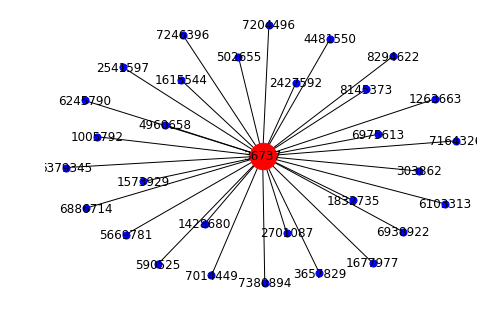

In [7]:
G = nx.Graph() 

infile = open("egosample.txt", "r+")

for line in infile:
    stuff = line.rstrip().split(",")
    G.add_edge(stuff[0], stuff[1])

node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=700, node_color='r', with_labels=True)
plt.show()